In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_theme(style="whitegrid")# this is define the theme of the graphs


this is all the import methodsni need for this project

In [39]:
external_data_frame = pd.read_csv('laptop_price - dataset.csv')
external_data_frame.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


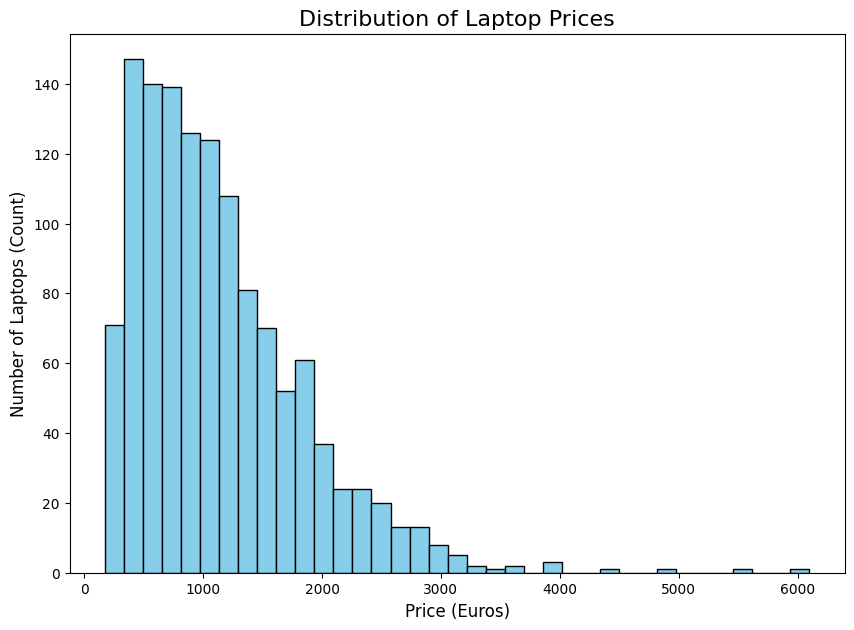

In [40]:
plt.figure(figsize=(10,7))
plt.hist(external_data_frame['Price (Euro)'], bins=37, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euros)', fontsize=12)
plt.ylabel('Number of Laptops (Count)', fontsize=12)
plt.show()

here I built the graph firstly I have determined the size of the graph. after that I took the name of each colom that I wanted to compare. lastly I tell him the names of the axises and the name of the entire graph.

In [37]:
company_prices_dict = external_data_frame.groupby('Company')['Price (Euro)'].apply(list).to_dict()
print("Prices for Apple:")
print(company_prices_dict['Apple'])
company_avg_price = {}
for company, price in sorted(company_prices_dict.items()):
    avrage = 0
    for i in range(len(price)):
        if (i + 1) < len(price):
            avrage += price[i]
        else:
            avrage = avrage/(i + 1)
    company_avg_price[company] = avrage #new dict that including dust the average price as a index and the name of the company as a key
save_name = "" # saving the name and the amout to compare
save_max = 0
for company_name , max_avg in company_avg_price.items(): #finding the max index and saving the name
    if save_max < max_avg:
        save_max = max_avg
        save_name = company_name
    else:
        continue
print("the most expensive company is: ", save_name)
print(company_avg_price)

Prices for Apple:
[1339.69, 898.94, 2537.45, 1803.6, 2139.97, 1158.7, 2439.97, 1262.4, 1518.55, 2858.0, 1099.0, 998.0, 1419.0, 1510.0, 2040.0, 1958.9, 1165.0, 1300.0, 1163.0, 1279.0, 959.0]
the most expensive company is:  Razer
{'Acer': 630.6030693069307, 'Apple': 1518.5319047619046, 'Asus': 1121.4021052631576, 'Chuwi': 231.33, 'Dell': 1196.455395189003, 'Fujitsu': 512.6666666666666, 'Google': 1158.0, 'HP': 1077.4639179104474, 'Huawei': 674.5, 'LG': 1466.0, 'Lenovo': 1093.0698269896193, 'MSI': 1706.1488888888894, 'Mediacom': 257.14285714285717, 'Microsoft': 1301.0, 'Razer': 2846.285714285714, 'Samsung': 1340.2222222222222, 'Toshiba': 1221.4375, 'Vero': 168.425, 'Xiaomi': 899.7125000000001}


first I created new dict and after I compute the average of each company I entered it g to a new dict that includin just the name of the compny and his average price of cumputers.

In [ ]:
def categorife_os(os_name): #checking each name 
    if 'mac' in os_name or 'Mac' in os_name:
        return 'macOS'
    elif 'Windows' in os_name:
        return'Windows'
    elif 'Android' in os_name:
        return'Android'
    elif 'Chrome' in os_name:
        return'Chrome'
    elif 'Linox' in os_name:
        return'Linox'
    else:
        return os_name
external_data_frame['OpSys'] = external_data_frame['OpSys'].apply(categorife_os)
print(external_data_frame['OpSys'].unique())
print("-" * 55)

#creating the graphs
uniqeu_system = external_data_frame['OpSys'].unique()
for os_name in uniqeu_system:
    subset = external_data_frame[external_data_frame['OpSys'] == os_name]# creating table with the current company computers



['macOS' 'No OS' 'windows' 'Linux' 'Android' 'Chrome']
-------------------------------------------------------
